<a href="https://colab.research.google.com/github/noohinaaz/DSA-Intermediate-Level/blob/main/Business_Case_Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WELCOME TO SCALER -CLUSTERING CASE STUDY**

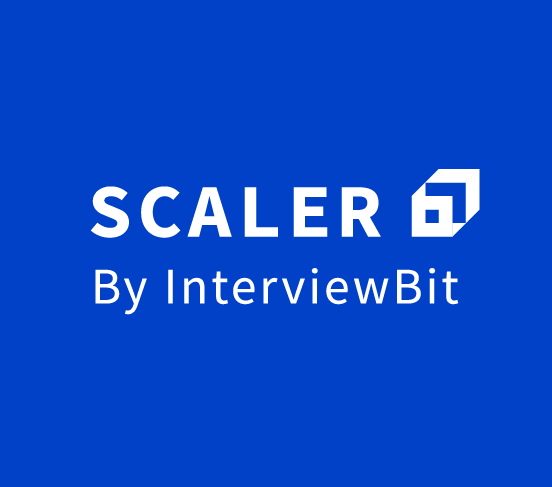

Problem Statement : task of clustering information of a segment of Scaler learners on the basis of their job profile, company, and other features. 

1.   First Understanding Basic Data
2.   Non-Graphical analysis
3.   Graphical Analysis Univariate Analysis
4.   Graphical Bivariate Analysis
5. Data Pre-processing
5.   Missing Value & Outlier Detection
8. Data Imputation
9. Feature Engineering
10. Manual Clustering: 

11. Unsupervised learning: 
    * Checking clustering tendency, Elbow method & K- means clustering
    *    Hierarchical Clustering
10.   Business Insights
11.   Recommendations

# **First Understanding Basic Data**

In [ ]:
#importing basic libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading csv file directly
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv",index_col=0)

In [ ]:
#first 10 rows
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
89962,otre tburgjta,459c5a345b2bf8bc5c85d4e2314d91dd4709c85fb14587...,2018.0,1100000,FullStack Engineer,2019.0
36266,wjxtzn,865512212ef42126d5f21258538d6848d6858b1b16fcbb...,2019.0,400000,NaN,2021.0
202415,ywr ntwyzgrgsxto,97fba8b3cbb58ac6b84cde91130ce2af1d6ef117647bc3...,2014.0,950000,FullStack Engineer,2019.0
83662,cxqnhvr tburgjtt,59d4ab5a2840e28312b0d71c51dce64f181bacc0597a7f...,2012.0,650000,Backend Engineer,2021.0
159005,qtamho,d0117d39b21eec380250d92a513765e24a83e7333cf5aa...,2016.0,1460000,Backend Engineer,2019.0
181492,hxuvny,813b6492e6f0e4a9152138e2cc4b8c418119f0427eba28...,2011.0,4050000,NaN,2018.0
46063,yaew rxet,714ec879c885efddff51c85c96055b6f800be8d9487d33...,2015.0,360000,NaN,2020.0
186728,gunhb,049e80363214810ab51dda82125587e62bcde0168451ff...,2012.0,2800000,NaN,2019.0
39445,ovbohzs qa xzonxnhnt xzaxv mvzsvrgqt,c1e16ac881e4f818de47b92d2d5f176b06d340160fad9e...,2018.0,1520000,Engineering Intern,2016.0
52115,eqtoytq,8a71105bd76e07b84f07a336bc4785a2ee5da7d9dbc9e6...,2018.0,600000,NaN,2019.0


# **Non-Graphical analysis**

In [ ]:
#info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [ ]:
#Finding Null values if any
df.isna().sum()


company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [ ]:
#%of null values
(df.isna().sum()/ len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [ ]:
#Description of Data Frame
df.describe()


,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


* ctc mean is 2.2 Million rupees
* orgyear median is 2016 

In [ ]:
#Description of object type columns in df.
df.describe(include="object")


,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


* Unique job positions are 1017
* number of unique companies which are unique are 32799

# **Data Pre-processing**

In [ ]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
    
mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [ ]:
df["company_hash"].nunique()

37299

In [ ]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x))) 
df["company_hash"].nunique()

37208

In [ ]:
df["job_position"].nunique()

1017

In [ ]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x))) 
df["job_position"].nunique()

857

In [ ]:
#dropping unwanted columns
df.drop("email_hash",axis = 1,inplace=True)

In [ ]:
#Top 5 rows
df.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year
74486,mn,2013.0,1400000,nan,2021.0
4574,bxzanqtt,2019.0,350000,devops engineer,2021.0
17439,bvny wgaj,2018.0,700000,fullstack engineer,2021.0
8533,rvzaxosjq,2015.0,740000,qa engineer,2020.0
172180,atrr ntwyzgrgsxto,2012.0,300000,support engineer,2019.0


In [ ]:
#Finding duplicated rows if any
df.duplicated().sum()

17597

In [ ]:
#Null values in the date frame
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [ ]:
(df["company_hash"] == "").sum()

89

In [ ]:
(df["company_hash"] == "nan").sum()

44

In [ ]:
(df["job_position"] == "").sum()

9

In [ ]:
(df["job_position"] == "nan").sum()

52562

In [ ]:
#Rows with company or job position as null
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
58252,zgn vuurxwvmrt vwwghzn,2021.0,500000,,2021.0
22738,,2019.0,450000,fullstack engineer,2020.0
125001,,2020.0,2100000,data scientist,2019.0
161691,yaew mvzp,2001.0,100000000,,2021.0
198235,,2015.0,200000,nan,2019.0
5544,,2020.0,350000,other,2021.0
117571,,2010.0,4500000,nan,2019.0
184690,,2012.0,1730000,nan,2016.0
123816,,2018.0,300000,nan,2021.0
130750,,2019.0,700000,nan,2019.0


In [ ]:
#length of such rows
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [ ]:
#Remaining non null rows
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


In [ ]:
df["orgyear"].isna().sum()

86

# **Imputing Employee Start Year as per the median year as per each company.**

In [ ]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
206918    2018.0
206919    2017.0
206920    2016.0
206921    2020.0
206922    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [ ]:
df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)


In [ ]:
df["orgyear"].isna().sum()


0

In [ ]:
df.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year
104389,uvjnb,2014.0,2400000,android engineer,2020.0
56222,aogen xzzgcvnxgzo rru,2013.0,700000,ios engineer,2019.0
91380,vqcxza evoyxgz,2016.0,760000,qa engineer,2020.0
57098,gnytq,2015.0,100310000,other,2020.0
140131,gqvwrt,2018.0,2100000,backend engineer,2020.0


# **Outliers Treatment :**


## **Employement Start Year**

In [ ]:
df["orgyear"].value_counts()


2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 78, dtype: int64

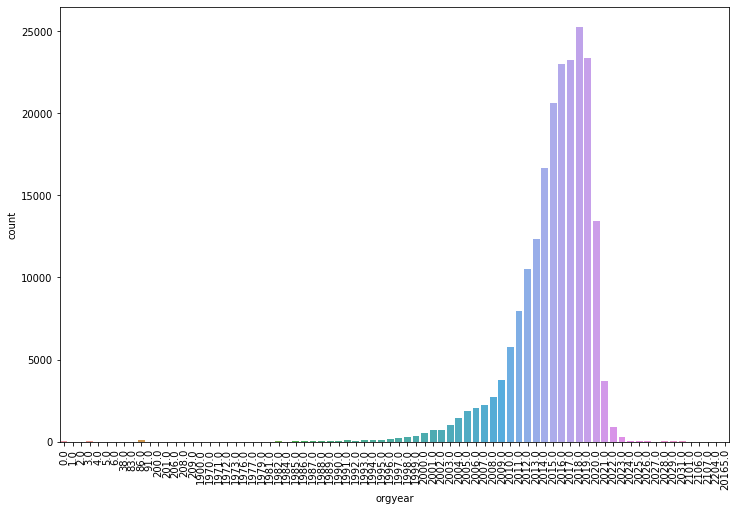

In [ ]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

orgyear is a left skewed chart with median at 2016

In [ ]:
df["orgyear"].quantile(0.001)


1990.0

In [ ]:
df["orgyear"].quantile(0.999)


2023.0

In [ ]:
df["orgyear"] = df["orgyear"].clip(1990,2022)


## **Graphical visualization of year of joining**

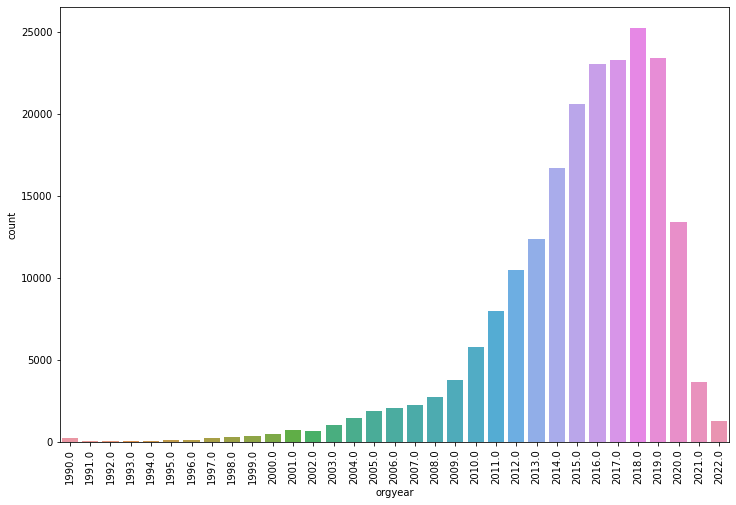

In [ ]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

## **ctc updated_year**

In [ ]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [ ]:
df["ctc_updated_year"].quantile(0.99)


2021.0

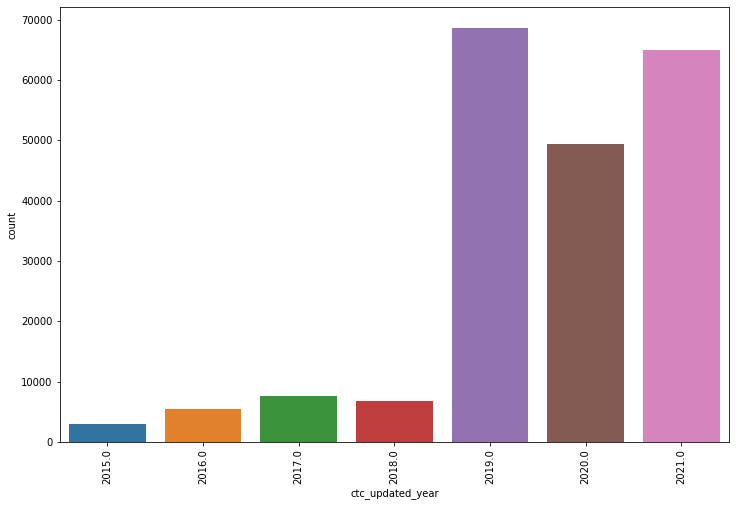

In [ ]:
sns.countplot(df["ctc_updated_year"])
plt.xticks(rotation = 90)
plt.show()

## **outlier treatment for CTC**

In [ ]:
df["ctc"].quantile(0.01)


37000.0

In [ ]:
df["ctc"].quantile(0.999)


200000000.0

In [ ]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]


In [ ]:
df


,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


<AxesSubplot:xlabel='ctc', ylabel='Density'>

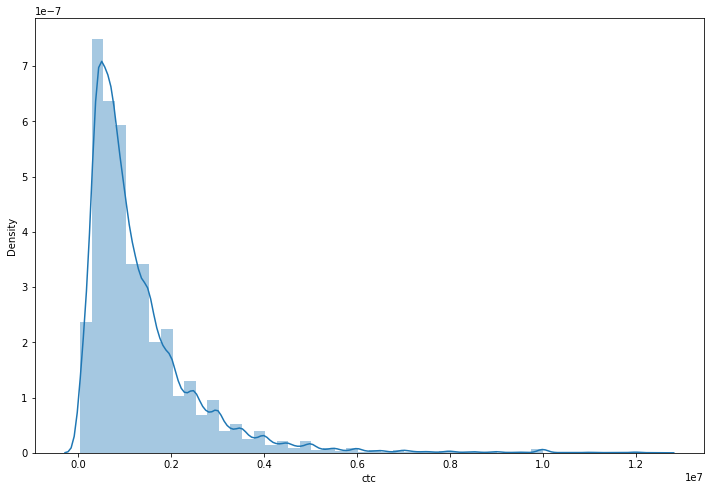

In [ ]:
sns.distplot(df["ctc"])


In [ ]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan


In [ ]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan


# **Feature Engineering**

### Masked company name to "Others" having count less than 5

In [ ]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"


In [ ]:
(df["company_hash"] == "Others").sum()


46434

In [ ]:
df['orgyear'].describe()


count    201625.000000
mean       2015.104769
std           4.256063
min        1990.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: orgyear, dtype: float64

## years of experience = current year - employement start year



In [ ]:
df["years_of_experience_in_organization"] = 2023 - df["orgyear"] 


In [ ]:
df.sample(2)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
10288,bwpxzotj,2019.0,600000,NaN,2020.0,4.0
158540,gutzntdn,2020.0,150000,NaN,2019.0,3.0


<AxesSubplot:xlabel='years_of_experience_in_organization', ylabel='count'>

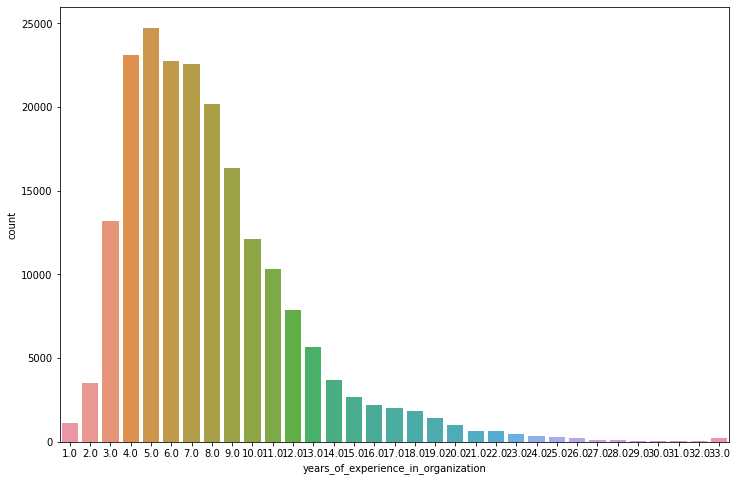

In [ ]:
sns.countplot(df["years_of_experience_in_organization"])


In [ ]:
df.duplicated().sum()


37683

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(163942, 6)

In [ ]:
df.isna().sum()


company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36745
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

## **Treating records having ctc_updated_year higher than their organization joining year**

In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

7181

In [ ]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)


In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()


0

In [ ]:
df.sample(2)



,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
42654,vngoojzntr,2020.0,750000,NaN,2020.0,3.0
173609,ourvoybvny,2019.0,650000,other,2020.0,4.0


Filling null values with others -- if not done before

In [ ]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isna().sum()


company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [ ]:
df.duplicated().sum()


1061

In [ ]:
df.describe()


,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,163942.000000,1.639420e+05,163942.000000,163942.000000
mean,2014.772218,1.425498e+06,2019.595540,8.227782
std,4.402053,1.303985e+06,1.334962,4.402053
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.039999e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 163942 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         163942 non-null  object 
 1   orgyear                              163942 non-null  float64
 2   ctc                                  163942 non-null  int64  
 3   job_position                         163942 non-null  object 
 4   ctc_updated_year                     163942 non-null  float64
 5   years_of_experience_in_organization  163942 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ MB


## **Graphical Representation - Bivariate Analysis**

<AxesSubplot:xlabel='ctc', ylabel='years_of_experience_in_organization'>

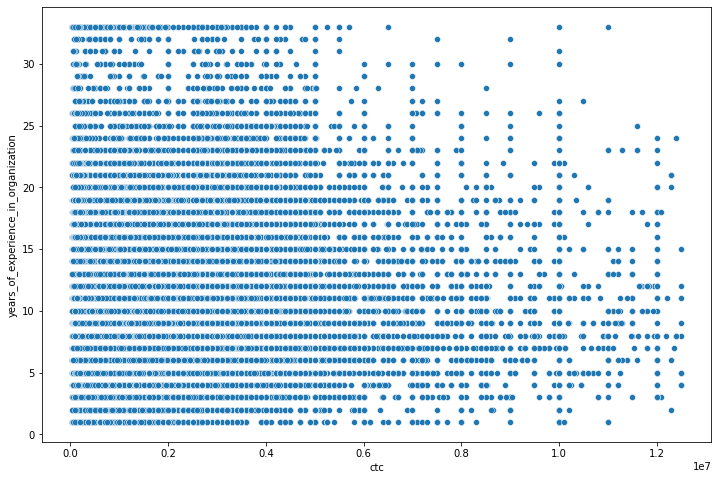

In [ ]:
sns.scatterplot(df.ctc,df.years_of_experience_in_organization)


In [ ]:
df.columns


Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

## Manual Clustering
* based on Company , 
* Job position and 
* Years of experience
* Learner's "designation_in_organization"

In [ ]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization",
                                                         "job_position",
                                                         "company_hash"])["ctc"].describe() 

In [ ]:
GROUPED_CTC


count  \
years_of_experience_in_organization job_position       company_hash                               
1.0                                 Others             Others                              58.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33.0                                qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             1.586207e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             2.080212e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [ ]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization",
              "job_position",
              "company_hash"],
        how = "left")

In [ ]:
df_GROUPED_CTC_BY_E_P_C


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0


In [ ]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

* whichever learner has ctc compared to their years of experience , respective company , position
giving designation as 3 
* when ctc is < 50th percentile in his position ,experience and company
giving designation as 2 
* when ctc is between 50th and 75th percentile in his position ,experience and company
giving designation as 1 
* when ctc is > 75th percentile in his position ,experience and company

In [ ]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)


In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)


2    0.456393
3    0.331660
1    0.211947
Name: designation_in_organization, dtype: float64

In [ ]:
df_GROUPED_CTC_BY_E_P_C


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.shape


(163942, 7)

# **Manual Clustering on company and job position**

* grouping by each job_position and company ,
* finding which class of job an individual have,
* based on his ctc compared to his job_position and respective company.

In [ ]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3520.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.366188e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.445330e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [ ]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')


In [ ]:
df_GROUPED_C_J.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
5948,fxuqg rxbxnta,2015.0,1300000,ios engineer,2021.0,8.0,4.0,1.117500e+06,1.903287e+05,850000.0,1075000.0,1160000.0,1202500.0,1300000.0
103600,vagmt,2017.0,2500000,fullstack engineer,2019.0,6.0,178.0,2.785528e+06,1.411558e+06,48000.0,1985000.0,2500000.0,3491250.0,9000000.0
12374,sxnyhm,2012.0,3000000,backend engineer,2021.0,11.0,2.0,3.500000e+06,7.071068e+05,3000000.0,3250000.0,3500000.0,3750000.0,4000000.0
58217,rxbtqgvawgb,2015.0,1720000,Others,2019.0,8.0,5.0,1.944000e+06,6.036804e+05,1500000.0,1650000.0,1720000.0,1850000.0,3000000.0
9413,wgzwtznqxd,2015.0,200000,other,2021.0,8.0,60.0,7.235000e+05,8.938331e+05,45000.0,390000.0,570000.0,777500.0,6800000.0


In [ ]:
# creating classes basis on the salary in their respective company
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
62085,nvnv wgzohrnvzwj otqcxwto,2019.0,500000,android engineer,2021.0,4.0,41.0,6.746829e+05,2.516453e+05,330000.0,450000.0,690000.0,850000.0,1200000.0,3
94750,zgn vuurxwvmrt vwwghzn,2021.0,300000,support engineer,2021.0,2.0,36.0,5.372778e+05,3.420701e+05,100000.0,300000.0,400000.0,700000.0,1400000.0,3
136392,axqtwnx,2008.0,2200000,frontend engineer,2019.0,15.0,19.0,2.404158e+06,1.304103e+06,600000.0,1450000.0,2000000.0,3239500.0,4900000.0,2
6455,xtdwtta ntwyzgrgsj ogrhnxgzo uqxcvnt rxbxnta,2015.0,900000,backend engineer,2021.0,8.0,2.0,8.500000e+05,7.071068e+04,800000.0,825000.0,850000.0,875000.0,900000.0,1
119129,rvqotz nghmqg xzegntwy rna,2014.0,1250000,backend engineer,2019.0,9.0,53.0,1.006151e+06,7.225689e+05,115000.0,600000.0,900000.0,1250000.0,5150000.0,2


In [ ]:
df_GROUPED_C_J.classs.value_counts(normalize=True)


3    0.435373
2    0.320101
1    0.244526
Name: classs, dtype: float64

In [ ]:
df_GROUPED_C_J.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]


company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
Name: 0, dtype: object

In [ ]:
df_GROUPED_C_J.iloc[0]


company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
                                                      'orgyear',
                                                      'ctc',
                                                      'job_position',
                                                      'years_of_experience_in_organization',
                                                      'ctc_updated_year'], how='left')

In [ ]:
df_Grouped.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
144454,trrhwxvz,2014.0,850000,Others,2016.0,9.0,2,1
158004,bgzgnjut,2008.0,800000,frontend engineer,2019.0,15.0,2,3
9557,bxwqgogen,2017.0,1140000,other,2020.0,6.0,3,3
43414,xzegojo,2016.0,436000,Others,2019.0,7.0,3,3
152478,ovu,2015.0,950000,backend engineer,2016.0,8.0,3,3


In [ ]:
df_Grouped.shape


(166228, 8)

## Manual Clustering based on company

* based on ctc per company , assigning company as tier 1 2 and 3 per each learners

In [ ]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')

In [ ]:
df_company.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
139164,lgyzogz wgznqgr,2010.0,1650000,engineering leadership,2019.0,13.0,13.0,1.539231e+06,8.954558e+05,650000.0,930000.0,1290000.0,1650000.0,3840000.0
162411,st ytvrnywvqt,2017.0,1000000,backend engineer,2020.0,6.0,146.0,1.840542e+06,1.112518e+06,75000.0,1050000.0,1505000.0,2552500.0,5000000.0
4556,avxrjyhzn,2011.0,3750000,fullstack engineer,2019.0,12.0,59.0,1.775000e+06,1.084732e+06,575000.0,1000000.0,1400000.0,2090000.0,5500000.0
118495,ftrro evqsg,2012.0,1528000,backend engineer,2019.0,11.0,293.0,1.643846e+06,1.088956e+06,70000.0,800000.0,1400000.0,2150000.0,7370000.0
87059,ctqxkgz,2016.0,240000,backend engineer,2020.0,7.0,270.0,1.478015e+06,1.499206e+06,70000.0,850000.0,1100000.0,1500000.0,12000000.0


In [ ]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [ ]:
df_company.tier.value_counts(normalize=True)


3    0.477364
2    0.282911
1    0.239725
Name: tier, dtype: float64

In [ ]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
               axis = 1,
               inplace=True)

In [ ]:
df_company.iloc[0]


company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
tier                                                2
Name: 0, dtype: object

In [ ]:
df_Grouped.iloc[0]


company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash',
                     'orgyear','ctc',
                     'job_position',
                     'years_of_experience_in_organization',
                     'ctc_updated_year'
                    ])

In [ ]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...,...,...
171311,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2,3,3
171312,husqvawgb,2017.0,500000,Others,2020.0,6.0,3,3,3
171313,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2,3,3
171314,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1,1,1


In [ ]:
X = df_Grouped.copy()


In [ ]:
X.shape


(171316, 9)

In [ ]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)


# **Final data for Model :**

In [ ]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2017.0,700000,2019.0,6.0,3,3,3
4,2017.0,1400000,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...
171311,2008.0,220000,2019.0,15.0,2,3,3
171312,2017.0,500000,2020.0,6.0,3,3,3
171313,2021.0,700000,2021.0,2.0,2,3,3
171314,2019.0,5100000,2019.0,4.0,1,1,1


# Standardization:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [ ]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.229439,-0.238430,0.298195,-0.229439,-0.175910,-1.497105,-0.300556
1,0.680950,-0.741765,-0.452799,-0.680950,1.196414,1.001707,0.933655
2,0.003683,0.458493,0.298195,-0.003683,-1.548235,-1.497105,-1.534766
3,0.455194,-0.548174,-0.452799,-0.455194,1.196414,1.001707,0.933655
4,0.455194,-0.006122,-0.452799,-0.455194,-0.175910,-1.497105,-1.534766
...,...,...,...,...,...,...,...
171311,-1.576605,-0.919866,-0.452799,1.576605,-0.175910,1.001707,0.933655
171312,0.455194,-0.703046,0.298195,-0.455194,1.196414,1.001707,0.933655
171313,1.358216,-0.548174,1.049190,-1.358216,-0.175910,1.001707,0.933655
171314,0.906705,2.859008,-0.452799,-0.906705,-1.548235,-1.497105,-1.534766


# **hierarchical Custering :**

* trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy and visualising in dendrogram.

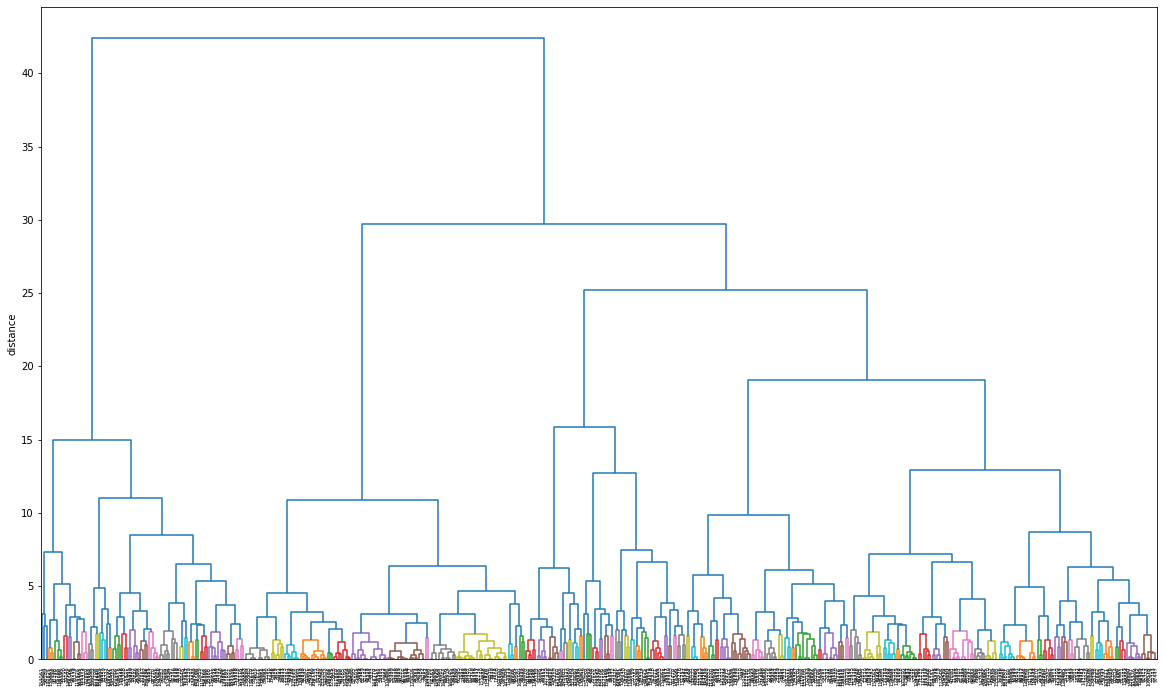

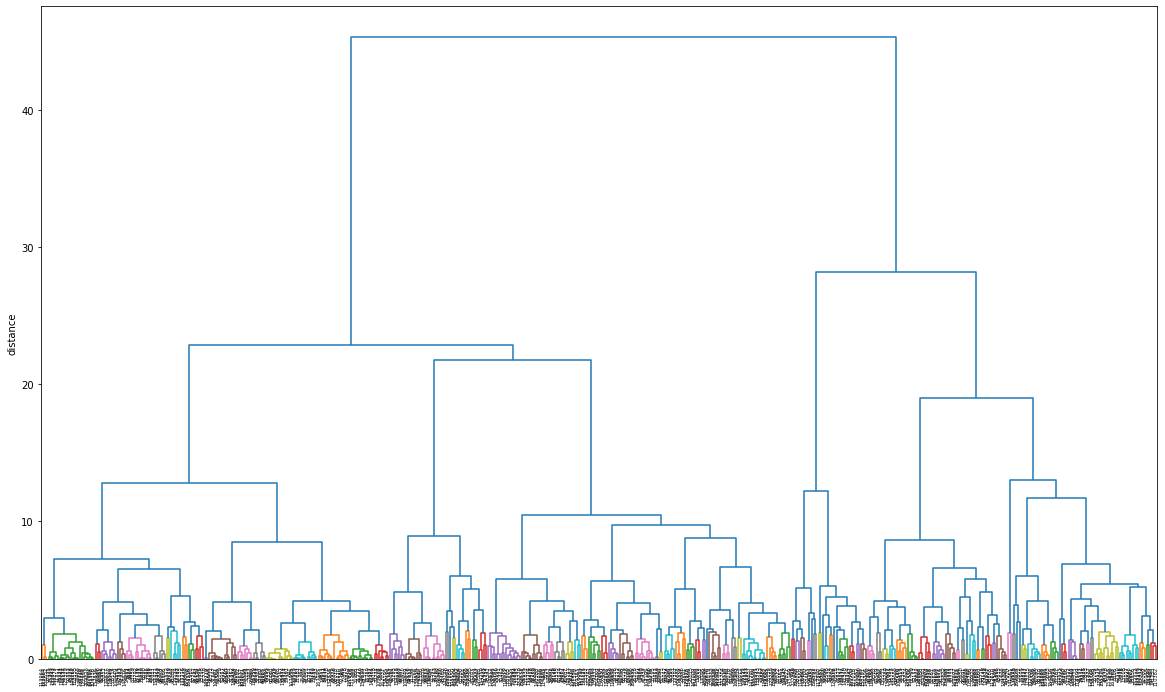

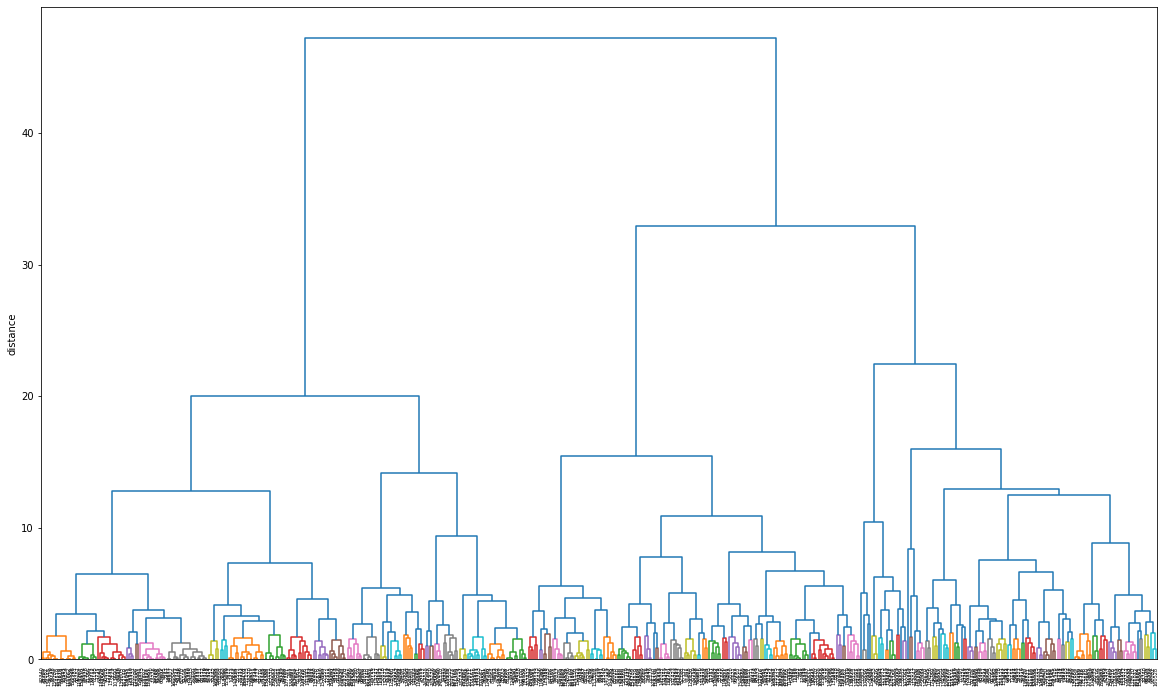

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()



import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

* Based on dendrogram , we can observe there are 3 clusters in the data based on similarity
* Further checking appropriate number of clusters using Elbow Method using k-Means clustering :

## **KMeans**

In [ ]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,
               random_state=654)
    y_pred = kM.fit_predict(X_sc)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1199212.0000000056,
 812618.2236265215,
 663951.368956448,
 577020.6292578074,
 517714.406022196,
 476402.9017863572,
 439357.96141058736,
 410144.6171733508,
 383988.5907258063]

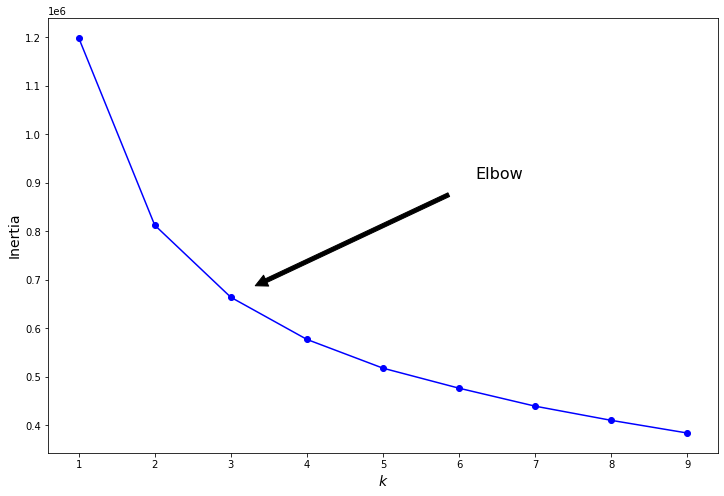

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

## **KMeans with n_clusters = 3**

In [ ]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)

In [ ]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters.sample(5)


,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
39976,atrgxnnt,2016.0,900000,frontend engineer,2021.0,7.0,3,2,2,2
118930,grd sqghu,2017.0,2670000,Others,2021.0,6.0,1,1,1,1
101373,rtvaoihvqta,2011.0,1100000,Others,2015.0,12.0,2,2,2,0
102383,sgrabvz ovwyo,2011.0,9000000,vice president,2021.0,12.0,2,2,1,0
94417,Others,2018.0,623000,fullstack engineer,2019.0,5.0,2,3,3,2


In [ ]:
clusters.shape


(171316, 10)

# **Insights | EDA after Clustering :**

<AxesSubplot:xlabel='orgyear', ylabel='ctc'>

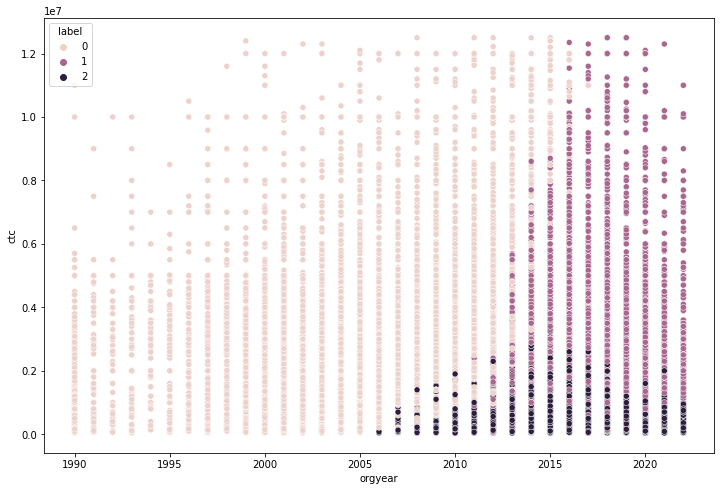

In [ ]:
sns.scatterplot(clusters["orgyear"],
               clusters["ctc"],
               hue = clusters["label"])

*  based on above scatter plot , we can observe , a cluster of learners received CTC upto 30 LPA who joined after 2006-07.
*  there's a group of learners who are very much experienced.
*  and also learners joined after 2012-13 receiving CTC between 20 LPA to upto 1.5cr.

<AxesSubplot:xlabel='label'>

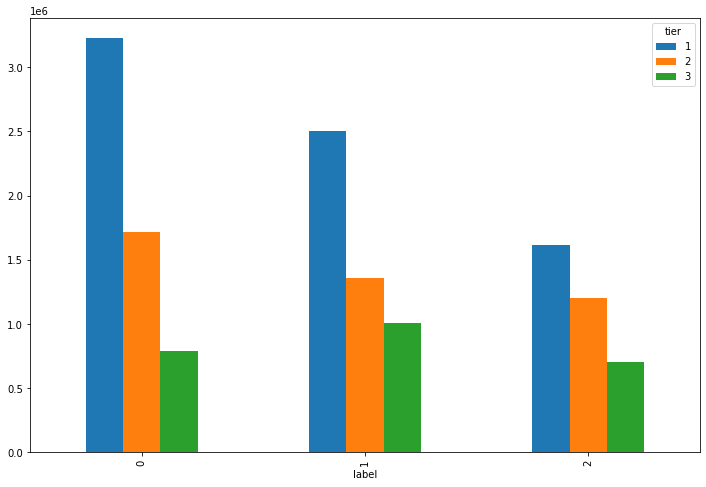

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

* Based on k-Means Clustering algorithm output , as well as manual clustering , learners from tier1 company receiving very high CTC.

<AxesSubplot:xlabel='label'>

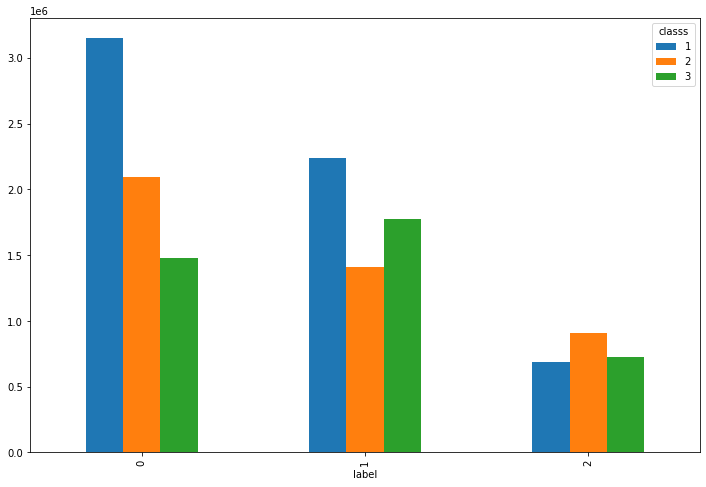

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='label'>

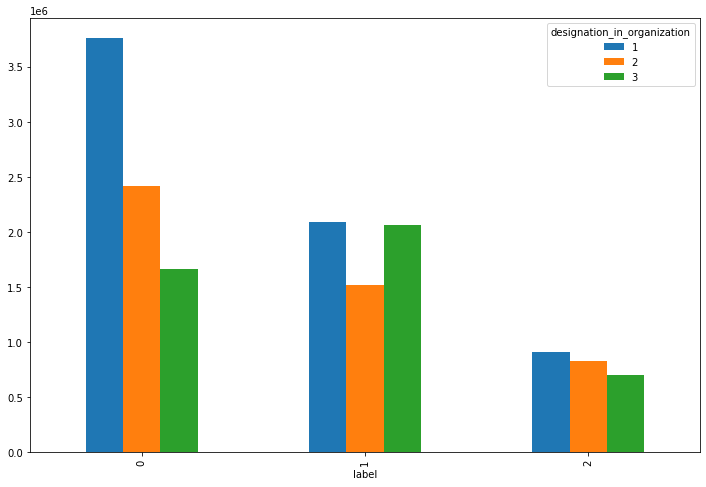

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["designation_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='years_of_experience_in_organization'>

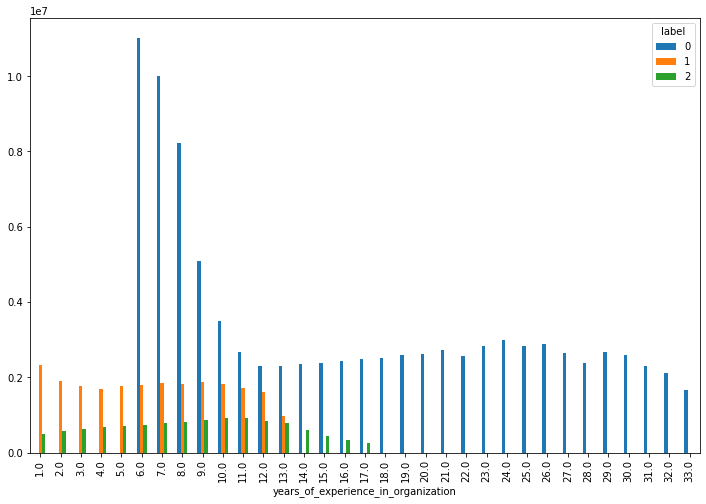

In [ ]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

* Cluster label 0 , are those learners who are very very experienced,
experienced learners between 6 to 10 years of experience, earning above 40 LPA up tp 1.5Cr.

<AxesSubplot:xlabel='years_of_experience_in_organization'>

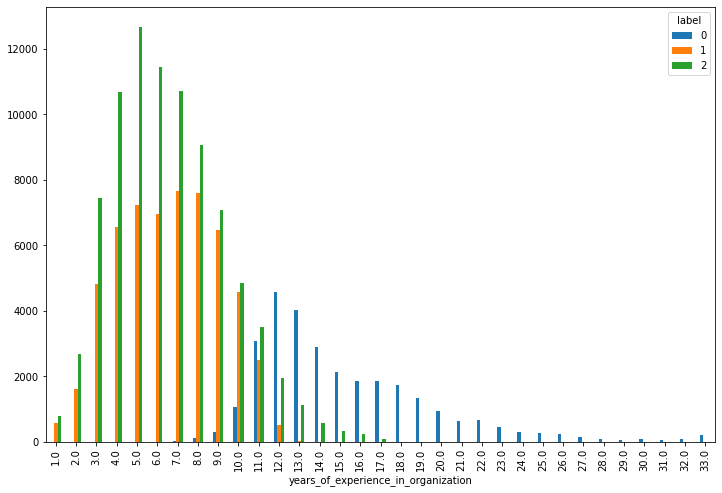

In [ ]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            
       ).plot(kind = "bar")

* Majority of Learners are experienced between 1 to 15 years . (49.73%)- (Cluster 2)
* there is a group of learners having 8 to upto 33 years of experience. (33%) - (Cluster 0)
* 16.95% of learners who have experiences - (cluster 1)

In [ ]:
clusters.label.value_counts(normalize=True)*100


2    49.734409
1    33.308623
0    16.956968
Name: label, dtype: float64

## years_of_experience_in_organization per each cluster group of learners

<AxesSubplot:xlabel='label'>

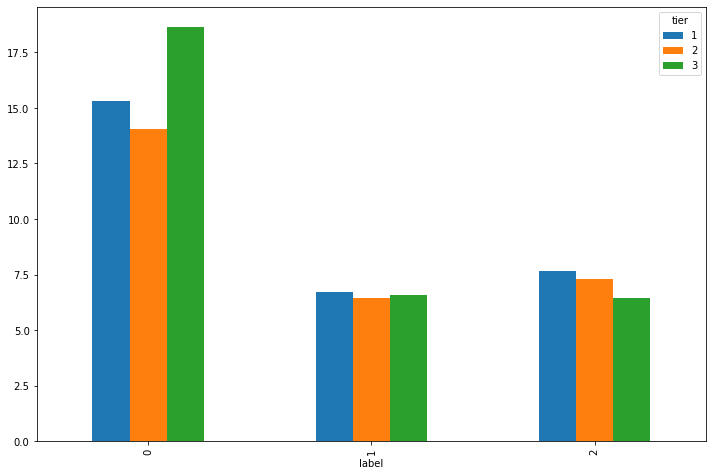

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],
            values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean
       ).plot(kind = "bar")

In [ ]:
clusters.columns


Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization', 'designation_in_organization',
       'classs', 'tier', 'label'],
      dtype='object')

## Statistical Summary based on Each Cluster :

In [ ]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T


label                                                 0             1  \
ctc                                 count  2.905000e+04  5.706300e+04   
                                    mean   2.543348e+06  1.802940e+06   
                                    std    1.751976e+06  1.272597e+06   
                                    min    3.955000e+04  6.500000e+04   
                                    25%    1.420000e+06  1.000000e+06   
                                    50%    2.100000e+06  1.500000e+06   
                                    75%    3.147500e+06  2.200000e+06   
                                    max    1.250000e+07  1.250000e+07   
classs                              count  2.905000e+04  5.706300e+04   
                                    mean   1.625886e+00  1.544574e+00   
                                    std    6.937293e-01  5.252113e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    2.000000e+00  2.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  2.905000e+04  5.706300e+04   
                                    mean   1.484200e+00  1.648774e+00   
                                    std    6.478262e-01  5.742163e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    1.000000e+00  2.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  2.905000e+04  5.706300e+04   
                                    mean   1.520678e+01  6.557945e+00   
                                    std    4.339403e+00  2.474935e+00   
                                    min    6.000000e+00  1.000000e+00   
                                    25%    1.200000e+01  5.000000e+00   
                                    50%    1.400000e+01  7.000000e+00   
                                    75%    1.700000e+01  8.000000e+00   
                                    max    3.300000e+01  1.300000e+01   

label                                                 2  
ctc                                 count  8.520300e+04  
                                    mean   7.562107e+05  
                                    std    5.033019e+05  
                                    min    3.800000e+04  
                                    25%    4.000000e+05  
                                    50%    6.300000e+05  
                                    75%    1.000000e+06  
                                    max    5.600000e+06  
classs                              count  8.520300e+04  
                                    mean   2.831191e+00  
                                    std    3.751798e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
tier                                count  8.520300e+04  
                                    mean   2.900731e+00  
                                    std    3.010974e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  8.520300e+04  
                                    mean   6.541436e+00  
                        

## **Recommendations: **

* Tier-1 companies pay more ctc than tier-2 companies.So students should target more for tier-1 companies.
* Students with more experience can expect more chances of earning more than 1 Cr.
* Experienced Learners could target for 40Lakhs+ CTC.
* Majority of Learners are from 1-15 years experience .So Scaler should target this learners more.
* People who joined after 2014(label 1 ,2 ), contains people with more diverse designations in equal numbers.